In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
plt.style.use('ggplot')

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import linear_model



pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Loading dataset
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-energy-efficiency.csv'))
# df = df.set_index('business_id')
df

,RC,SA,WA,RA,OH,OR,GA,GAD,HL,CL
0,0.98,514.50,294.00,110.25,7.00,2,0.00,0,15.55,21.33
1,0.98,514.50,294.00,110.25,7.00,3,0.00,0,15.55,21.33
2,0.98,514.50,294.00,110.25,7.00,4,0.00,0,15.55,21.33
3,0.98,514.50,294.00,110.25,7.00,5,0.00,0,15.55,21.33
4,0.90,563.50,318.50,122.50,7.00,2,0.00,0,20.84,28.28
5,0.90,563.50,318.50,122.50,7.00,3,0.00,0,21.46,25.38
6,0.90,563.50,318.50,122.50,7.00,4,0.00,0,20.71,25.16
7,0.90,563.50,318.50,122.50,7.00,5,0.00,0,19.68,29.60
8,0.86,588.00,294.00,147.00,7.00,2,0.00,0,19.50,27.30
9,0.86,588.00,294.00,147.00,7.00,3,0.00,0,19.95,21.97


In [50]:
df_train, df_test = train_test_split(df,test_size=0.4, random_state=42)

In [51]:
df_train.describe()

,RC,SA,WA,RA,OH,OR,GA,GAD,HL,CL
count,460.00,460.00,460.00,460.00,460.00,460.00,460.00,460.00,460.00,460.00
mean,0.76,672.21,317.91,177.15,5.23,3.48,0.24,2.88,22.08,24.37
std,0.11,87.44,44.09,45.22,1.75,1.11,0.13,1.54,10.05,9.52
min,0.62,514.50,245.00,110.25,3.50,2.00,0.00,0.00,6.01,10.94
25%,0.69,612.50,294.00,147.00,3.50,3.00,0.10,2.00,12.97,15.56
50%,0.74,686.00,318.50,220.50,3.50,3.00,0.25,3.00,17.34,21.24
75%,0.82,735.00,343.00,220.50,7.00,4.00,0.40,4.00,29.93,32.84
max,0.98,808.50,416.50,220.50,7.00,5.00,0.40,5.00,42.77,48.03


In [52]:
df_train.corr()

,RC,SA,WA,RA,OH,OR,GA,GAD,HL,CL
RC,1.00,-0.99,-0.19,-0.86,0.82,-0.01,-0.01,-0.01,0.61,0.62
SA,-0.99,1.00,0.18,0.88,-0.86,0.01,0.00,0.01,-0.65,-0.66
WA,-0.19,0.18,1.00,-0.31,0.30,0.02,-0.01,0.00,0.47,0.45
RA,-0.86,0.88,-0.31,1.00,-0.97,-0.00,0.01,0.01,-0.86,-0.86
OH,0.82,-0.86,0.30,-0.97,1.00,-0.01,-0.01,-0.01,0.89,0.89
OR,-0.01,0.01,0.02,-0.00,-0.01,1.00,-0.01,0.03,-0.00,0.01
GA,-0.01,0.00,-0.01,0.01,-0.01,-0.01,1.00,0.19,0.27,0.20
GAD,-0.01,0.01,0.00,0.01,-0.01,0.03,0.19,1.00,0.08,0.05
HL,0.61,-0.65,0.47,-0.86,0.89,-0.00,0.27,0.08,1.00,0.98
CL,0.62,-0.66,0.45,-0.86,0.89,0.01,0.20,0.05,0.98,1.00


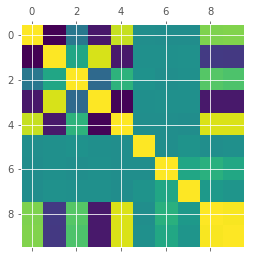

In [53]:
corr = df_train.corr()
plt.matshow(corr)

Based on the correlation matrix, it seems that HL and CL are heavily correlated. We can ignore one of the response matrix. For the purpose of this analysis, lets predict HL

Similarly, we can eliminate features that are heavily correlated with each other. Additionally, to prioritize variables that are higher correlated against the response matrix. The feature pairs that are most correlated are:

* RC and SA
* RA and OH

Comparing each of these features to HL, 
* Corr for RC vs HL: 0.61
* Corr for SA vs HL: -0.65 (Pick SA!)
* Corr for RA vs HL: -0.86
* Corr for OH vs HL: 0.89 (Pick OH!)



In [54]:
df_train = df_train[[ 'SA','WA', 'OH', 'OR', 'GA', 'GAD', 'HL']]


In [55]:
corr = df_train.corr()
corr

,SA,WA,OH,OR,GA,GAD,HL
SA,1.00,0.18,-0.86,0.01,0.00,0.01,-0.65
WA,0.18,1.00,0.30,0.02,-0.01,0.00,0.47
OH,-0.86,0.30,1.00,-0.01,-0.01,-0.01,0.89
OR,0.01,0.02,-0.01,1.00,-0.01,0.03,-0.00
GA,0.00,-0.01,-0.01,-0.01,1.00,0.19,0.27
GAD,0.01,0.00,-0.01,0.03,0.19,1.00,0.08
HL,-0.65,0.47,0.89,-0.00,0.27,0.08,1.00


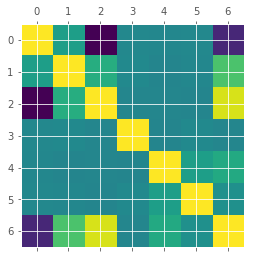

In [56]:
plt.matshow(corr)

Based on a second round of collinearity tests, SA and OH are also heavily correlated. Since OH has a higher correlation with HL, I will keep OH and drop SA

In [57]:
df_train = df_train[['WA', 'OH', 'OR', 'GA', 'GAD', 'HL']]

In [58]:
corr = df_train.corr()
corr

,WA,OH,OR,GA,GAD,HL
WA,1.00,0.30,0.02,-0.01,0.00,0.47
OH,0.30,1.00,-0.01,-0.01,-0.01,0.89
OR,0.02,-0.01,1.00,-0.01,0.03,-0.00
GA,-0.01,-0.01,-0.01,1.00,0.19,0.27
GAD,0.00,-0.01,0.03,0.19,1.00,0.08
HL,0.47,0.89,-0.00,0.27,0.08,1.00


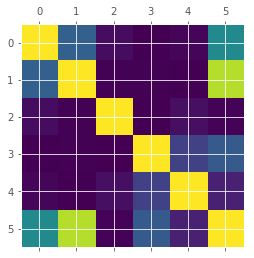

In [59]:
plt.matshow(corr)

In [60]:
smf.ols(formula = 'HL ~ WA + OH + OR + GA + GAD', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HL   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     959.1
Date:                Mon, 21 Aug 2017   Prob (F-statistic):          1.10e-238
Time:                        20:52:02   Log-Likelihood:                -1150.7
No. Observations:                 460   AIC:                             2313.
Df Residuals:                     454   BIC:                             2338.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.5916      1.145    -21.473      0.000     -26.842     -22.341
WA             0.0523      0.003     15.848      0.000       0.046       0.059
OH             4.7044      0.083     56.698      0.000       4.541       4.867
OR            -0.0211      0.125     -0.169      0.866      -0.267       0.225
GA            20.5884      1.052     19.563      0.000      18.520      22.657
GAD            0.2427      0.091      2.652      0.008       0.063       0.422
==============================================================================
Omnibus:                       21.759   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.153
Skew:                           0.362   Prob(JB):                     6.32e-08
Kurtosis:                       4.098   Cond. No.                     2.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since OR is not statistically significant, lets rerun the model without OR

In [61]:
smf.ols(formula = 'HL ~ WA + OH + GA + GAD', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HL   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1201.
Date:                Mon, 21 Aug 2017   Prob (F-statistic):          3.02e-240
Time:                        20:52:05   Log-Likelihood:                -1150.7
No. Observations:                 460   AIC:                             2311.
Df Residuals:                     455   BIC:                             2332.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.6608      1.068    -23.093      0.000     -26.759     -22.562
WA             0.0522      0.003     15.866      0.000       0.046       0.059
OH             4.7046      0.083     56.766      0.000       4.542       4.867
GA            20.5913      1.051     19.589      0.000      18.526      22.657
GAD            0.2422      0.091      2.651      0.008       0.063       0.422
==============================================================================
Omnibus:                       21.830   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.230
Skew:                           0.363   Prob(JB):                     6.08e-08
Kurtosis:                       4.098   Cond. No.                     2.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using SKLearn to build a predictive model. Lets start with linear

In [81]:
y  = df_train[['HL']]
X = df_train[['WA', 'OH','GA', 'GAD']]

In [82]:
# def X_linear(df):
#     X = df[ ['x'] ]

#     return X

model_linear = linear_model.LinearRegression().fit(X, y)

print model_linear.intercept_
print model_linear.coef_

def predict_linear(df):
    return model_linear.predict(X)

def score_linear(df):
    return model_linear.score(X, y)

score_linear(df_train)

[-24.66083232]
[[  0.05223859   4.7046062   20.59132571   0.24220789]]


0.91350931876549479

Quadratic Model

In [85]:
def X_quadratic(df):
#     X = df[ ['x'] ]
    X2 = X ** 2

    return X2

model_quadratic = linear_model.LinearRegression().fit(X_quadratic(X), y)

print model_quadratic.intercept_
print model_quadratic.coef_

def predict_quadratic(df):
    return model_quadratic.predict(X)

def score_quadratic(df):
    return model_quadratic.score(X,y)

score_quadratic(df_train)

[-3.04659286]
[[  7.85433880e-05   4.48771755e-01   4.02446452e+01   4.21591703e-02]]


-1.5813124030079559